In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/train_processsed.csv')
df.head(5)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,...,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,...,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,...,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,...,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,...,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [3]:
y = df['SalePrice']
x = df.drop(['Id','SalePrice'],axis=1)


Text(0, 0.5, 'cumulative explained variance')

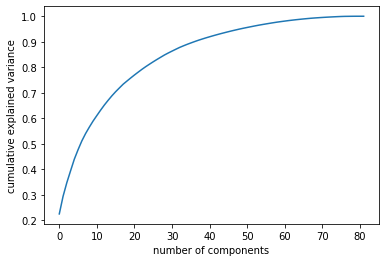

In [4]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [38]:
pca = PCA(50)  # project from 84 to 40 dimensions
X_pca = pca.fit_transform(x)
print(X_pca.shape)

(1460, 50)


In [39]:
pca.explained_variance_ratio_.sum()

0.9529381526971775

In [40]:
principalDf = pd.DataFrame(data = X_pca)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.822609,0.583752,0.164552,-0.180034,-0.186048,0.362798,0.012371,-0.302042,-0.026932,-0.113227,0.027954,0.051036,-0.090962,-0.236138,0.287543,0.081191,0.070127,-0.100911,-0.166593,0.196663,0.114137,-0.015541,0.038221,-0.169171,0.028631,-0.021534,0.078334,-0.013146,-0.014896,-0.024643,-0.092243,0.003947,0.127740,-0.026206,-0.039627,-0.066062,0.104827,0.079454,-0.026262,-0.025418,-0.036462,-0.028167,0.002294,0.002166,-0.018234,0.012024,0.023475,-0.018581,0.019061,0.071075
1,0.073519,-0.319406,0.012247,-0.004697,-0.188833,-0.614229,0.130776,0.131880,0.165504,-0.212171,0.265734,-0.261864,0.024096,-0.221279,0.019505,-0.099605,-0.042470,-0.092135,0.238469,-0.054088,-0.196345,-0.034694,0.031923,-0.162654,0.354595,0.035476,-0.249847,0.017119,-0.051462,0.028400,0.175085,-0.075151,-0.048308,-0.353740,0.074157,0.201685,-0.175928,0.105128,-0.254681,-0.227945,0.247350,-0.034227,-0.089313,-0.148204,0.046306,0.021584,0.145587,-0.084081,-0.034708,-0.020041
2,-0.961834,0.375955,0.144042,-0.253384,-0.013944,0.109699,-0.014364,0.047395,0.128575,-0.130523,-0.055553,-0.041026,-0.044363,0.192290,-0.050316,-0.177516,0.135571,0.034618,-0.136121,0.080293,0.026676,0.054569,0.035704,-0.086481,-0.091309,-0.047259,0.171308,-0.082108,0.002915,-0.065385,0.042914,-0.047759,-0.064027,-0.036543,-0.089123,-0.147749,0.019188,0.073253,0.025385,-0.020124,-0.049981,-0.026876,0.014742,-0.009758,-0.063881,0.069252,0.004402,0.018105,0.029096,0.053549
3,0.361620,-0.246048,0.129060,-0.555287,0.088542,-0.363540,-0.101148,0.100532,0.050449,-0.170610,0.165513,-0.147353,-0.162611,-0.495877,-0.102045,0.509530,0.372790,-0.059941,-0.278005,0.151851,-0.364001,0.080272,0.229979,-0.024895,-0.116495,-0.135191,0.076896,-0.183033,-0.011687,-0.013383,-0.166451,0.501137,-0.210448,-0.155210,-0.094859,-0.022462,-0.150770,0.002675,0.114239,0.094207,0.184550,0.200685,-0.127762,0.340707,-0.111121,0.024549,-0.281212,0.218532,-0.074939,-0.217975
4,-1.219853,0.195589,0.172429,-0.290704,0.182889,0.002788,-0.021838,0.157690,0.204562,-0.188413,0.344382,-0.266028,-0.045031,0.445887,-0.250111,-0.075112,0.052977,-0.071285,-0.107057,0.172833,0.138087,0.120278,0.169129,-0.090016,0.066014,0.016157,-0.005117,-0.042772,-0.034719,0.010762,0.028560,0.014376,-0.069428,-0.172908,-0.045709,-0.072541,-0.084741,-0.114498,0.104487,-0.086870,-0.061269,-0.000029,0.028613,0.028718,0.102036,0.002226,0.001945,-0.048820,0.006412,0.000113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.672479,0.429184,0.174668,-0.346788,-0.152747,0.173110,-0.380030,0.063334,-0.063785,-0.029551,-0.212729,-0.020263,-0.184217,-0.006762,-0.076741,-0.155625,0.081708,0.080386,0.021002,-0.168951,-0.043219,0.010637,0.095935,-0.044527,0.043266,0.145861,0.023637,0.120781,-0.042343,0.011579,0.271642,0.032925,-0.022163,-0.070267,-0.066177,-0.000164,0.141169,-0.025253,0.028774,-0.059181,-0.004941,-0.007983,-0.027213,-0.026266,-0.059629,0.006055,-0.007655,0.018540,0.017858,-0.021397
1456,-0.006866,-0.215937,-0.103674,0.153961,-0.368894,0.318264,0.475005,0.637612,0.170643,-0.175892,-0.045759,0.225908,0.113545,0.005296,0.248908,0.504053,-0.351538,-0.084169,-0.124089,0.116243,-0.142877,-0.193052,0.266546,-0.170909,-0.414526,0.081637,0.014227,0.105725,0.044178,-0.099288,0.119163,-0.240804,0.128958,-0.107458,0.215698,0.131474,0.162604,-0.184333,0.028570,0.032647,0.087705,0.003349,0.010121,-0.074337,-0.027127,0.032483,0.004838,0.032712,0.013645,-0.122467
1457,-0.508909,0.156039,0.054134,-0.438117,-0.008112,0.408721,0.542219,0.471601,-0.213317,-0.000797,-0.478714,-0.320779,0.110997,0.079944,0.039197,0.133331,0.023067,0.018340,-0.065294,-0.369641,-0.366216,0.033885,0.136098,-0.305772,0.411409,-0.217663,0.102811,-0.074153,0.097144,0.062520,-0.288227,-0.12

In [41]:
total_df = pd.concat([principalDf,df['SalePrice']],axis=1)
total_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,SalePrice
0,-0.822609,0.583752,0.164552,-0.180034,-0.186048,0.362798,0.012371,-0.302042,-0.026932,-0.113227,0.027954,0.051036,-0.090962,-0.236138,0.287543,0.081191,0.070127,-0.100911,-0.166593,0.196663,0.114137,-0.015541,0.038221,-0.169171,0.028631,-0.021534,0.078334,-0.013146,-0.014896,-0.024643,-0.092243,0.003947,0.127740,-0.026206,-0.039627,-0.066062,0.104827,0.079454,-0.026262,-0.025418,-0.036462,-0.028167,0.002294,0.002166,-0.018234,0.012024,0.023475,-0.018581,0.019061,0.071075,12.247694
1,0.073519,-0.319406,0.012247,-0.004697,-0.188833,-0.614229,0.130776,0.131880,0.165504,-0.212171,0.265734,-0.261864,0.024096,-0.221279,0.019505,-0.099605,-0.042470,-0.092135,0.238469,-0.054088,-0.196345,-0.034694,0.031923,-0.162654,0.354595,0.035476,-0.249847,0.017119,-0.051462,0.028400,0.175085,-0.075151,-0.048308,-0.353740,0.074157,0.201685,-0.175928,0.105128,-0.254681,-0.227945,0.247350,-0.034227,-0.089313,-0.148204,0.046306,0.021584,0.145587,-0.084081,-0.034708,-0.020041,12.109011
2,-0.961834,0.375955,0.144042,-0.253384,-0.013944,0.109699,-0.014364,0.047395,0.128575,-0.130523,-0.055553,-0.041026,-0.044363,0.192290,-0.050316,-0.177516,0.135571,0.034618,-0.136121,0.080293,0.026676,0.054569,0.035704,-0.086481,-0.091309,-0.047259,0.171308,-0.082108,0.002915,-0.065385,0.042914,-0.047759,-0.064027,-0.036543,-0.089123,-0.147749,0.019188,0.073253,0.025385,-0.020124,-0.049981,-0.026876,0.014742,-0.009758,-0.063881,0.069252,0.004402,0.018105,0.029096,0.053549,12.317167
3,0.361620,-0.246048,0.129060,-0.555287,0.088542,-0.363540,-0.101148,0.100532,0.050449,-0.170610,0.165513,-0.147353,-0.162611,-0.495877,-0.102045,0.509530,0.372790,-0.059941,-0.278005,0.151851,-0.364001,0.080272,0.229979,-0.024895,-0.116495,-0.135191,0.076896,-0.183033,-0.011687,-0.013383,-0.166451,0.501137,-0.210448,-0.155210,-0.094859,-0.022462,-0.150770,0.002675,0.114239,0.094207,0.184550,0.200685,-0.127762,0.340707,-0.111121,0.024549,-0.281212,0.218532,-0.074939,-0.217975,11.849398
4,-1.219853,0.195589,0.172429,-0.290704,0.182889,0.002788,-0.021838,0.157690,0.204562,-0.188413,0.344382,-0.266028,-0.045031,0.445887,-0.250111,-0.075112,0.052977,-0.071285,-0.107057,0.172833,0.138087,0.120278,0.169129,-0.090016,0.066014,0.016157,-0.005117,-0.042772,-0.034719,0.010762,0.028560,0.014376,-0.069428,-0.172908,-0.045709,-0.072541,-0.084741,-0.114498,0.104487,-0.086870,-0.061269,-0.000029,0.028613,0.028718,0.102036,0.002226,0.001945,-0.048820,0.006412,0.000113,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.672479,0.429184,0.174668,-0.346788,-0.152747,0.173110,-0.380030,0.063334,-0.063785,-0.029551,-0.212729,-0.020263,-0.184217,-0.006762,-0.076741,-0.155625,0.081708,0.080386,0.021002,-0.168951,-0.043219,0.010637,0.095935,-0.044527,0.043266,0.145861,0.023637,0.120781,-0.042343,0.011579,0.271642,0.032925,-0.022163,-0.070267,-0.066177,-0.000164,0.141169,-0.025253,0.028774,-0.059181,-0.004941,-0.007983,-0.027213,-0.026266,-0.059629,0.006055,-0.007655,0.018540,0.017858,-0.021397,12.072541
1456,-0.006866,-0.215937,-0.103674,0.153961,-0.368894,0.318264,0.475005,0.637612,0.170643,-0.175892,-0.045759,0.225908,0.113545,0.005296,0.248908,0.504053,-0.351538,-0.084169,-0.124089,0.116243,-0.142877,-0.193052,0.266546,-0.170909,-0.414526,0.081637,0.014227,0.105725,0.044178,-0.099288,0.119163,-0.240804,0.128958,-0.107458,0.215698,0.131474,0.162604,-0.184333,0.028570,0.032647,0.087705,0.003349,0.010121,-0.074337,-0.027127,0.032483,0.004838,0.032712,0.013645,-0.122467,12.254863
1457,-0.508909,0.156039,0.054134,-0.438117,-0.008112,0.408721,0.542219,0.471601,-0.213317,-0.000797,-0.478714,-0.320779,0.110997,0.079944,0.039197,0.133331,0.023067,0.018340,-0.065294,-0.369641,-0.366216,0.033885,0.1360

In [42]:
y_target = total_df['SalePrice']
x_feature = total_df.drop(['SalePrice'],axis=1)

XGBoost Model

In [97]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [98]:
from sklearn.model_selection import train_test_split
x_feature_train,x_feature_test,y_target_train,y_target_test = train_test_split(x_feature,y_target,test_size=0.2, random_state=42)

In [99]:
#trying the xgboost regressor
xg_reg = xgb.XGBRegressor()

In [47]:
params = {'n_estimators':[100,500,900,1100,1500],
          'max_depth':[2,3,5,10,15],
          'booster':['gbtree','gblinear'],
          'learning_rate':[0.05,0.1,0.15,0.20],
          'min_child_weight':[1,2,3,4],
          
          }

In [48]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xg_reg,param_distributions=params,
                               cv=10,n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [49]:
#random_cv.fit(x_feature_train,y_target_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 10.1min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 10.6min finished


[05:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                                          verbosity=1),
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'booster': ['gbtree', 'gblinear'],

In [50]:
#random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [100]:
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=2, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [101]:
xg_reg.fit(x_feature_train,y_target_train)

[06:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.5,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=2, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [102]:
y_pred  = xg_reg.predict(x_feature_test)

In [103]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_target_test,y_pred))

0.20070006652883332

In [104]:
#test accuracy
from sklearn.metrics import r2_score
print(r2_score(y_target_test, y_pred))

0.7841500600660127


In [105]:
#trainn accuracy
y_pred_train = xg_reg.predict(x_feature_train)

In [106]:
np.sqrt(mean_squared_error(y_target_train,y_pred_train))

0.14268800551188987

In [107]:
print(r2_score(y_target_train,y_pred_train))

0.8664439724962154


In [108]:
ypred_norm = np.expm1(xg_reg.predict(x_feature_test))

In [109]:
ytest_norm = np.expm1(y_target_test)

In [110]:
#test rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest_norm,ypred_norm))

43871.31223497916

In [111]:
ypred_train_norm = np.expm1(xg_reg.predict(x_feature_train))


In [112]:
ytrain_norm = np.expm1(y_target_train)

In [113]:
#train rmse
np.sqrt(mean_squared_error(ytrain_norm,ypred_train_norm))

31955.601633793605

(0.0, 400000.0)

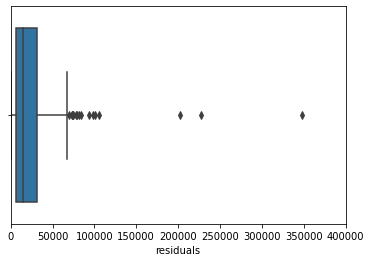

In [ ]:
sns.boxplot(x=(ypred_norm - ytest_norm).abs(),data=df)
plt.xlabel("residuals")
plt.xlim(0,400000)
#tried as much as close to zero

RandomForest 

In [87]:
x_feature_train,x_feature_test,y_target_train,y_target_test = train_test_split(x_feature,y_target,test_size=0.2, random_state=42)

In [88]:
rf_reg = RandomForestRegressor()

In [89]:
param = {
    'n_estimators':range(10,200,20),
    'min_samples_leaf':range(1,5,1),
    'max_depth':range(3,20,1),   
}

In [90]:
random = RandomizedSearchCV(estimator=rf_reg,param_distributions=param,
                               cv=10,n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [ ]:
#random.fit(x_feature_train,y_target_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   34.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 10.2min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 11.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [ ]:
random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
rf_reg = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
rf_reg.fit(x_feature_train,y_target_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
y_pred  = rf_reg.predict(x_feature_test)

In [94]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_target_test,y_pred))

0.18900210212141005

In [35]:
from sklearn.metrics import r2_score
print(r2_score(y_target_test, y_pred))

0.8181635063154928


In [95]:
#trainn accuracy
y_pred_train = rf_reg.predict(x_feature_train)

In [96]:
np.sqrt(mean_squared_error(y_target_train,y_pred_train))

0.06358025012297894

In [ ]:
print(r2_score(y_target_train,y_pred_train))

0.9728229613549604
